# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | taroa
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ndjole
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | espargos
City not found. Skipping...
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | kayangel
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | holualoa
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | rongelap
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | jati
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | ushuaia
Processing Record 23

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,68.77,71,3,11.50,PN,1722696988
1,taroa,8.7058,171.2275,82.20,76,15,3.51,MH,1722696989
2,lebu,-37.6167,-73.6500,51.21,87,100,11.39,CL,1722696990
3,waitangi,-43.9535,-176.5597,46.81,84,55,5.01,NZ,1722696991
4,ndjole,-0.1783,10.7649,92.05,39,86,6.82,GA,1722696993


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

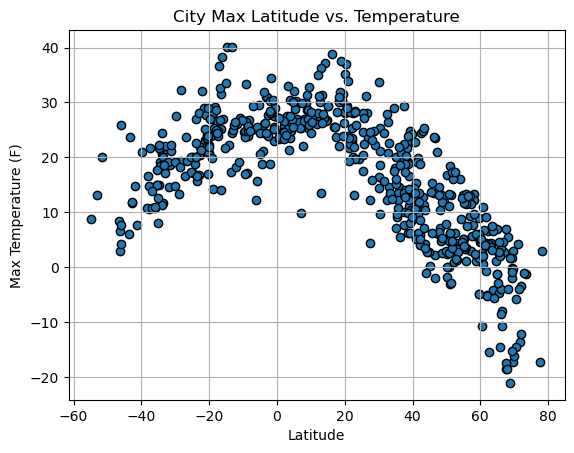

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
            city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolors = "black",
            label= "Cities"
 )


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

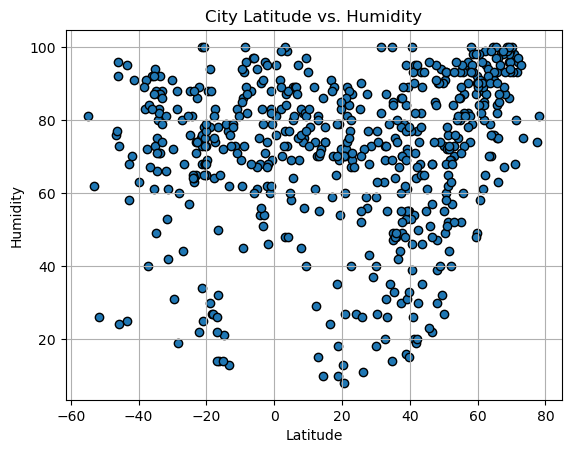

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
            city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolors = "black",
            label= "Cities"
 )


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

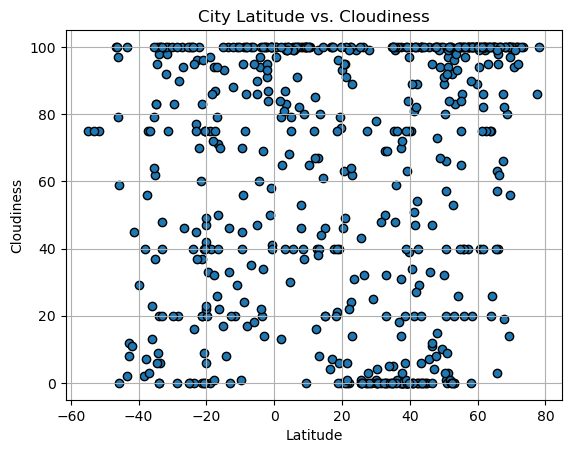

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
            city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolors = "black",
            label= "Cities"
 )


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

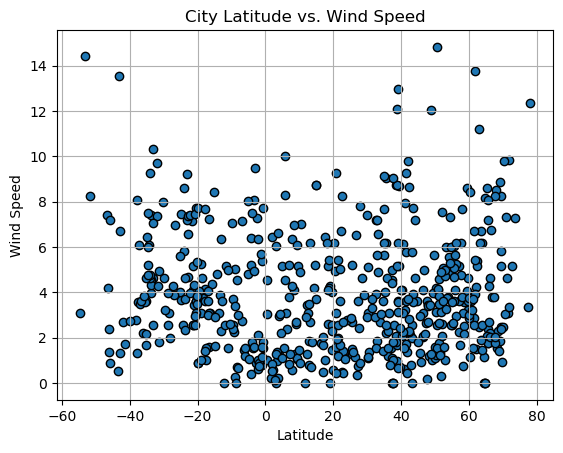

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
            city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolors = "black",
            label= "Cities"
 )


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots

def plot_R(x_values, y_values, coords, y_label, plot_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coords,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(plot_title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434125


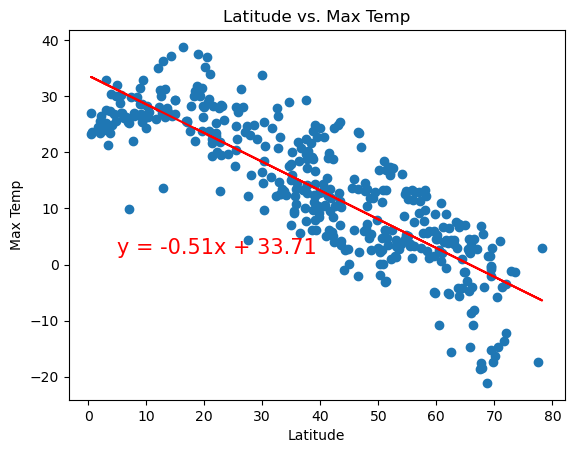

In [53]:
# Linear regression on Northern Hemisphere
plot_R(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (5,2), "Max Temp", "Latitude vs. Max Temp")

The r-squared is: 0.4121057168607252


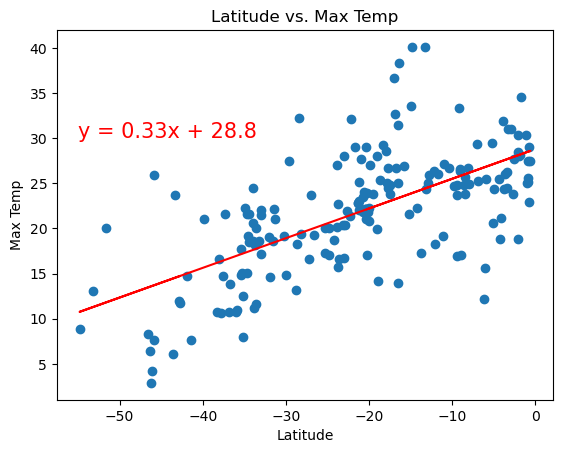

In [55]:
# Linear regression on Southern Hemisphere
plot_R(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-55,30), "Max Temp", "Latitude vs. Max Temp")

**Discussion about the linear relationship:** Temperatures are highest near the equator and decrease as latitude increases in the northern hempisphire. There are opposite correlations of temperature between north and south hemisphere, because of the earth's tilt. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789608


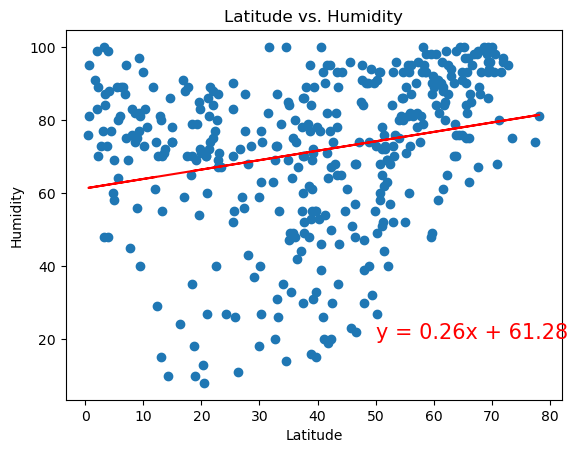

In [93]:
# Northern Hemisphere
plot_R(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50,20), "Humidity", "Latitude vs. Humidity")

The r-squared is: 0.0002808747046324618


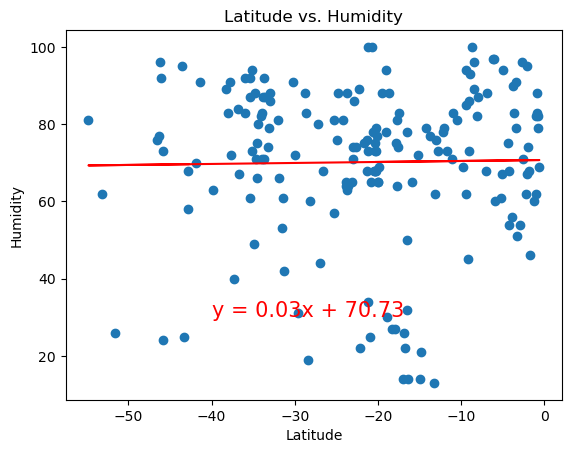

In [100]:
# Southern Hemisphere
plot_R(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-40,30), "Humidity", "Latitude vs. Humidity")

**Discussion about the linear relationship:** I believe what we are seeing here is that humidity tends to increase the further we move away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811043


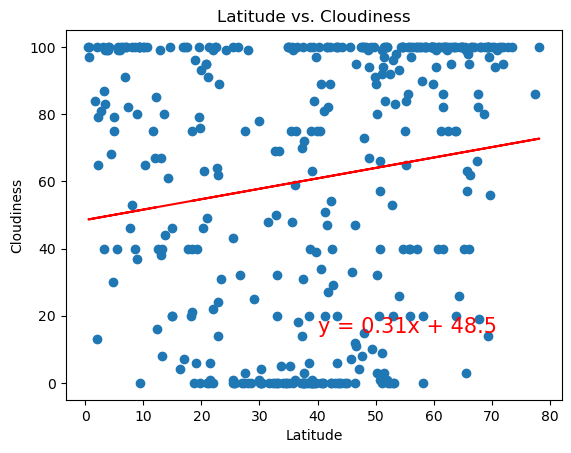

In [105]:
# Northern Hemisphere
plot_R(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (40,15), "Cloudiness", "Latitude vs. Cloudiness")

The r-squared is: 0.020567354299943663


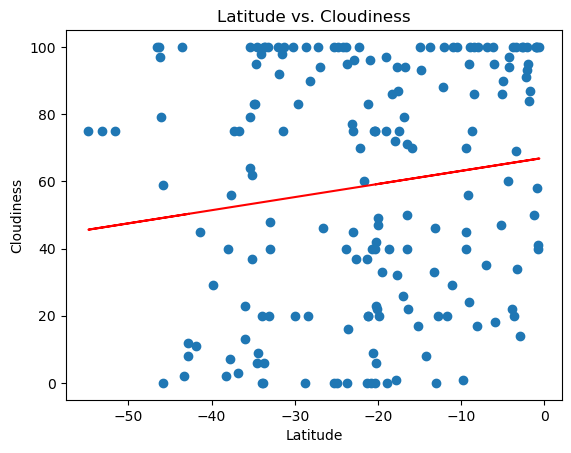

In [107]:
# Southern Hemisphere
plot_R(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (40,15), "Cloudiness", "Latitude vs. Cloudiness")

**Discussion about the linear relationship:** positive correlation, meaning more cloudiness as the coordinates increase from the equator; the southern hemisphere is almost the same level of cloudiness (flatter line) regardless of latitude.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449484


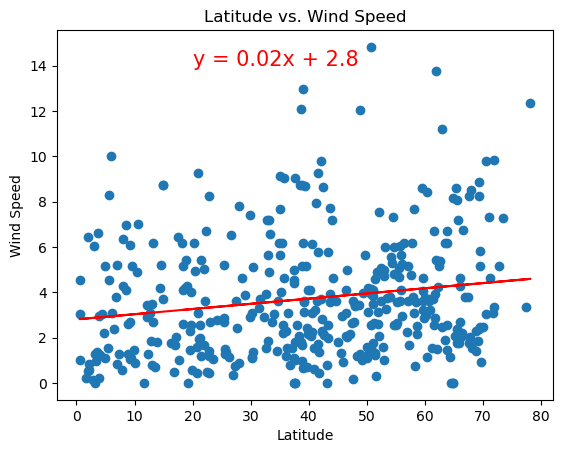

In [112]:
# Northern Hemisphere
plot_R(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (20,14), "Wind Speed", "Latitude vs. Wind Speed")

The r-squared is: 0.06223904070051575


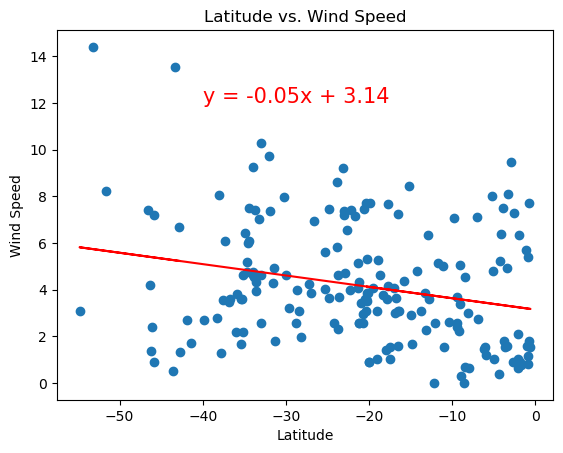

In [116]:
# Southern Hemisphere
plot_R(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-40,12), "Wind Speed", "Latitude vs. Wind Speed")

**Discussion about the linear relationship:** there is positive correlation between latitude and windiness in the NH. whereas the opposite effect (negative correlation) in the SH. 